# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [44]:
# Checking the number of mice.
mice_number = mouse_data['Mouse ID'].nunique()

# Print the result
print(mice_number)

249


In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print(duplicate_mouse_ids)


['g989']


In [64]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_data.drop_duplicates(subset='Mouse ID', keep='first')
cleaned_mouse_data.reset_index(drop=True, inplace=True)
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17
245,i557,0,45.0,0,Capomulin,Female,1,24
246,m957,0,45.0,0,Capomulin,Female,3,19
247,f966,0,45.0,0,Capomulin,Male,16,17


In [77]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count= cleaned_mouse_data['Mouse ID'].nunique()
print(unique_mice_count)

249


## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_grouped = mouse_data.groupby('Drug Regimen')

summary_stats_df = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Std. Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume'
})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
).rename_axis(None, axis=1)

# Display the summary statistics table
summary_stats_df

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

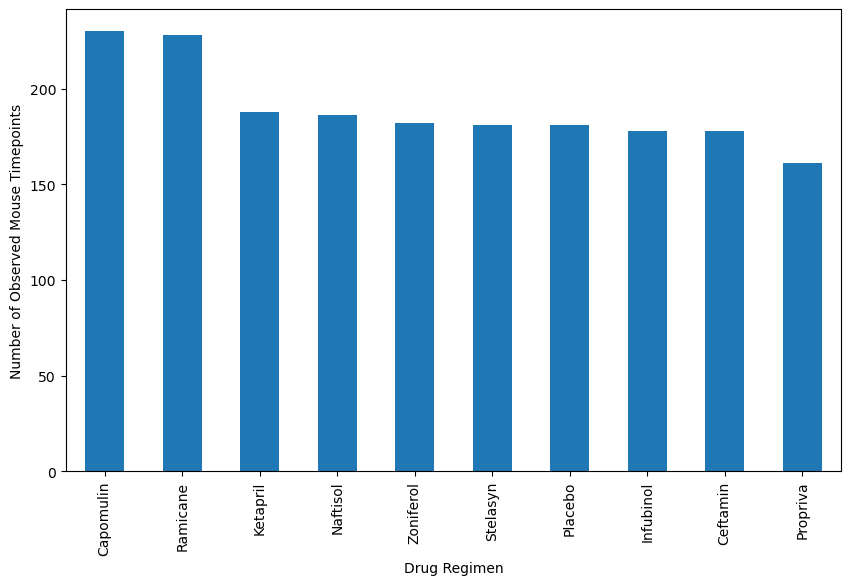

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_data['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Set plot labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')


# Display the plot
plt.show()

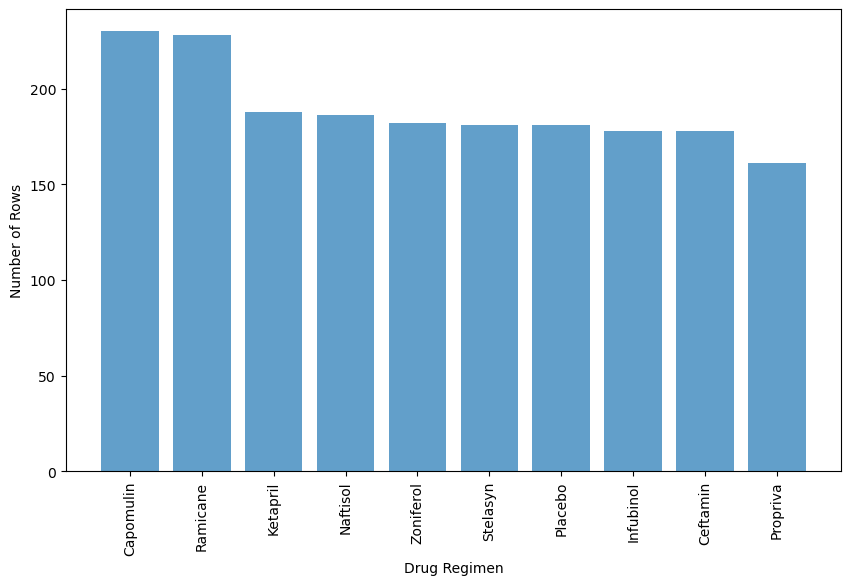

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_rows = mouse_data['Drug Regimen'].value_counts()

regimen_names = regimen_rows.index
counts = regimen_rows.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, align='center', alpha=0.7)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()


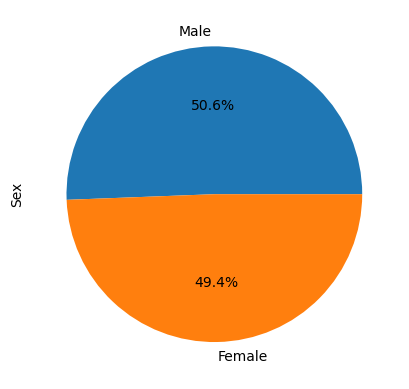

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandacounts = cleaned_mouse_data['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie',autopct='%1.1f%%')

# Display the plot
plt.show()

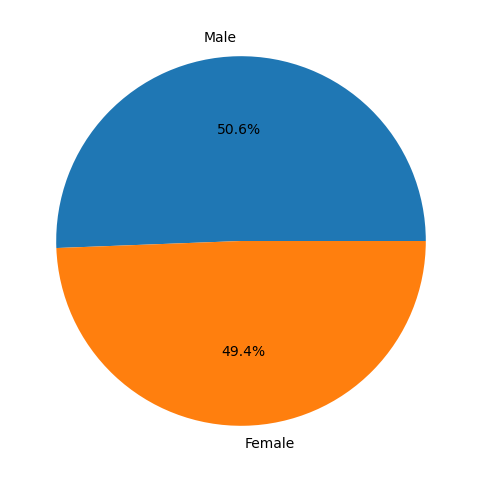

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pltcounts = mouse_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_pltcounts, labels=gender_counts.index, autopct='%1.1f%%')


# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volume_data = mouse_data[mouse_data['Drug Regimen'].isin(treatment_regimens)]

final_timepoints = final_tumor_volume_data.groupby('Mouse ID')['Timepoint'].max()

final_timepoints_df = pd.DataFrame({'Timepoint': final_timepoints}).reset_index()

final_tumor_volume_data = pd.merge(final_tumor_volume_data, final_timepoints_df, on=['Mouse ID', 'Timepoint'], how='inner')

final_tumor_volume_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,b128,Capomulin,38.982878
1,c326,Infubinol,36.321346
2,c139,Infubinol,72.226731
3,v339,Infubinol,46.250112
4,a577,Infubinol,57.031862
...,...,...,...
95,t565,Capomulin,34.455298
96,i557,Capomulin,47.685963
97,m957,Capomulin,33.329098
98,f966,Capomulin,30.485985


In [131]:

# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for regimen in treatment_regimens:

    regimen_data = mouse_data[mouse_data['Drug Regimen'] == regimen]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = regimen_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"{regimen}'s potential outliers:")
    if not outliers.empty:
        print(outliers['Tumor Volume (mm3)'])
    else:
        print("No potential outliers found.")
    print("\n")



Capomulin's potential outliers:
1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64


Ramicane's potential outliers:
514    22.050126
Name: Tumor Volume (mm3), dtype: float64


Infubinol's potential outliers:
No potential outliers found.


Ceftamin's potential outliers:
No potential outliers found.




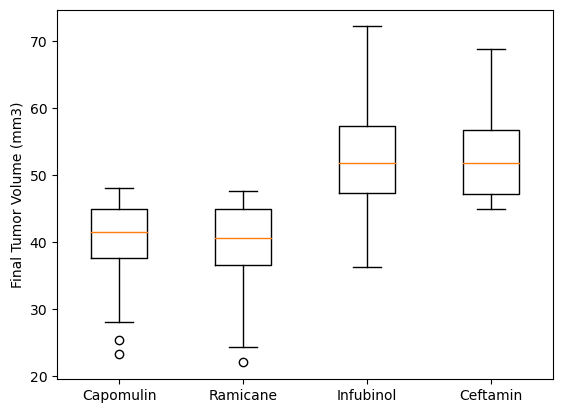

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = []

# Loop through each treatment regimen and collect tumor volume data
for regimen in treatment_regimens:
    regimen_data = mouse_data[mouse_data['Drug Regimen'] == regimen]
    tumor_vol_data.append(regimen_data['Tumor Volume (mm3)'])

# Create a box plot
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

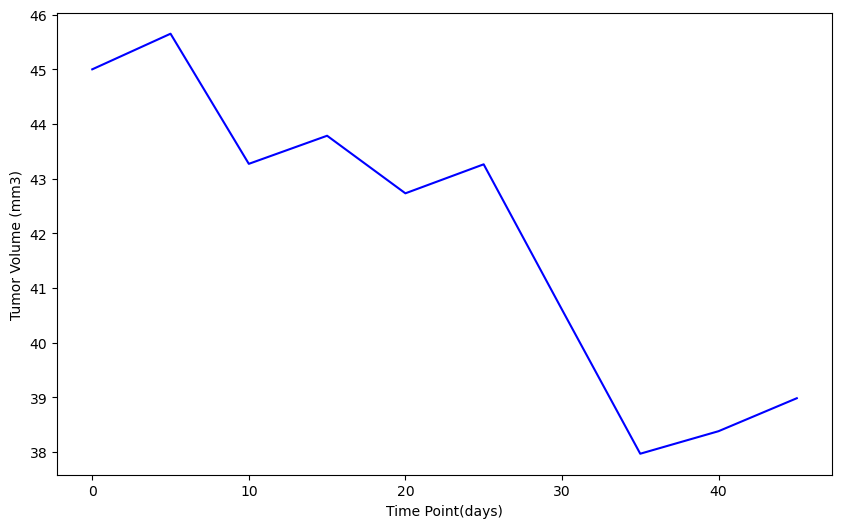

In [154]:
selected_mouse_id = 'b128' 

selected_mouse_data = mouse_data[(mouse_data['Mouse ID'] == selected_mouse_id) & (mouse_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'],linestyle='-', color='b')

plt.xlabel('Time Point(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

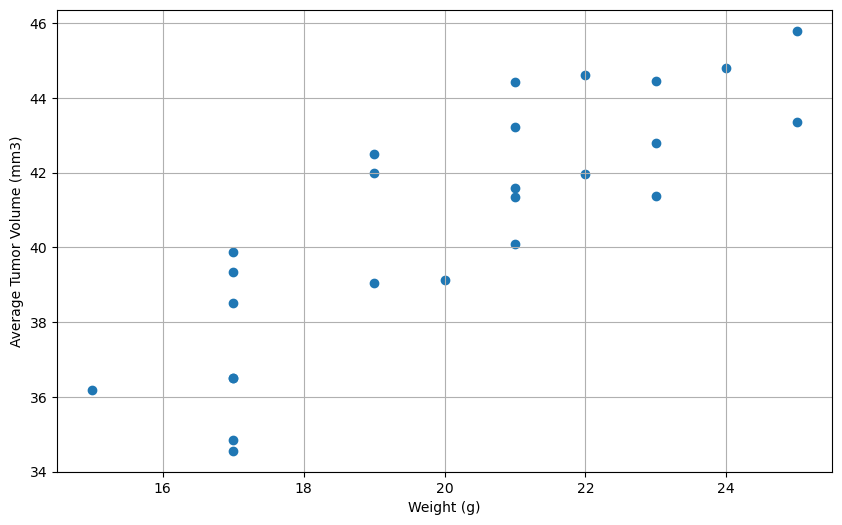

In [160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']

grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()


plt.show()

## Correlation and Regression

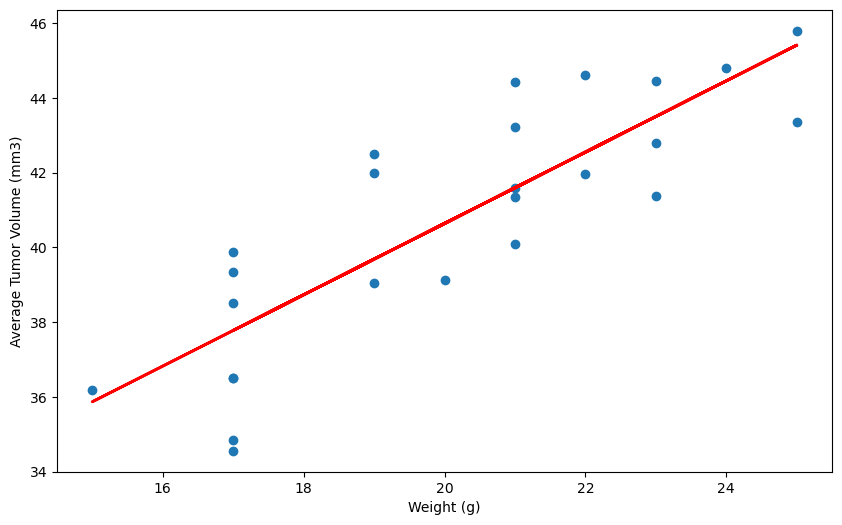

The correlation between mouse weight and the average tumor volume is 0.84


In [168]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']

grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

correlation_coefficient = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])[0]

slope, intercept = np.polyfit(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], 1)

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the linear regression line to the plot
plt.plot(grouped_data['Weight (g)'], slope * grouped_data['Weight (g)'] + intercept, color='red', linewidth=2)

plt.show()

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
